<a href="https://colab.research.google.com/github/frnkly/jayne-eats/blob/main/ml/notes/model-exploration-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Exploration using TensorFlow



# Data

In [71]:
# Dataset, organized as: [classification, consistency, temperature, [ingredients]].
raw_dataset = [
  # Pizzas
  [False, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'oil', 'olive', 'onion', 'salt', 'sugar', 'tomato']], # Olives
  [False, 'solid', 'warm', ['anchovy', 'bell_pepper', 'cheese', 'flour', 'garlic', 'mayonnaise', 'oil', 'olive', 'onion', 'salt', 'spinach', 'sugar']], # Anchovies
  [False, 'solid', 'warm', ['apple', 'coriander', 'cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar']], # Apple & goat cheese
  [True, 'solid', 'warm', ['arugula', 'bell_pepper', 'cheese', 'coriander', 'flour', 'garlic', 'oil', 'onion', 'salt', 'spinach', 'sugar', 'tomato']], # Arugula
  [True, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'mushroom', 'oil', 'onion', 'salt', 'sugar']], # Mushroom
  [True, 'solid', 'warm', ['cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar', 'tomato']], # Cheese

  # Products
  # [True, 'crunchy', 'normal', ['anise', 'baking_powder', 'egg', 'flour', 'oil', 'sugar']], # Biscotti
  # [True, 'crunchy', 'cool', ['almond', 'barley_malt', 'milk', 'rice', 'salt', 'sugar', 'wheat_bran', 'whole_grain_wheat']], # Vanilla almond Special K

  # Smoothies & milkshakes
  [True, 'chewy', 'cool', ['cookies', 'milk', 'skim_milk', 'sugar', 'vanilla']], # Oreo ice cream
  [False, 'thick', 'cool', ['blueberry', 'pineapple', 'strawberry']],
  [False, 'thick', 'cool', ['blueberry', 'kiwi', 'strawberry']],
  [False, 'thick', 'cool', ['chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['banana', 'chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['blueberry', 'kiwi', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['banana', 'milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'milk', 'kiwi', 'vanilla']],

  # Soups & chilis
  [False, 'mashed', 'warm', ['bay_leaf', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'salt', 'tomato', 'tumeric']], # Chole chickpea curry
  [False, 'mashed', 'warm', ['black_pepper', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'potato', 'salt', 'spinach', 'tomato', 'tumeric']], # Sweet potato curry
  [True, 'mashed', 'warm', ['black_pepper', 'butter', 'cheese', 'coriander', 'garlic', 'potato', 'salt']], # Mash potatoes
  [True, 'mashed', 'warm', ['bean', 'black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'tomato', 'tumeric']], # Chili
  [False, 'liquid', 'warm', ['black_pepper', 'butter', 'flour', 'garlic', 'onion', 'peanut', 'salt']], # Peanut soup
  [True, 'thick', 'warm', ['black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'squash']], # Butternut squash soup

  # Miscellaneous (stuff made out of ingredients from above)
  [True, 'crunchy', 'normal', ['almond', 'apple', 'arugula', 'cranberry', 'oil', 'salt']], # Arugula salad
  [True, 'solid', 'warm', ['black_pepper', 'cheese', 'egg', 'garlic', 'mushroom', 'oil', 'onion', 'red_pepper', 'salt', 'spinach']], # Mushroom spinach omelet
  [True, 'solid', 'warm', ['bean', 'black_pepper', 'oil', 'onion', 'rice', 'salt', 'tumeric']], # Rice and beans
  [True, 'solid', 'warm', ['black_pepper', 'mushroom', 'oil', 'onion', 'pea', 'rice', 'salt']], # Riz djondjon
  [True, 'solid', 'cool', ['banana', 'butter', 'egg', 'flour', 'milk', 'salt', 'strawberry']], # Crepes
  [False, 'solid', 'warm', ['black_pepper', 'oil', 'okra', 'onion', 'rice', 'salt', 'spinach']], # Kalalou
]

RAW_LABEL_COL = 0
RAW_CONSISTENCY_COL = 1
RAW_TEMPERATURE_COL = 2
RAW_INGREDIENTS_COL = 3

print('Size of data set:', len(raw_dataset))

Size of data set: 28


In [72]:
# Ingredients list.
ingredients_set = set()

for data in raw_dataset:
  ingredients_set |= set(data[RAW_INGREDIENTS_COL])

ingredients = sorted(list(ingredients_set))
print(f'Ingredients ({len(ingredients)}):', ingredients)

Ingredients (48): ['almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay_leaf', 'bean', 'bell_pepper', 'black_pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red_pepper', 'rice', 'salt', 'skim_milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']


In [73]:
# Processed dataset.
import pandas as pd

processed_dataset = []
feature_names = ['consistency', 'temperature'] + ingredients

for data in raw_dataset:
  data_ingredients_set = set(data[RAW_INGREDIENTS_COL])
  processed_data = [data[RAW_CONSISTENCY_COL], data[RAW_TEMPERATURE_COL]]

  for ingredient in ingredients:
    processed_data.append(1 if ingredient in data_ingredients_set else 0)
  
  processed_data.append(1 if data[RAW_LABEL_COL] else 0)
  
  processed_dataset.append(processed_data)

dataset = pd.DataFrame(processed_dataset, columns=[*feature_names, 'label'])
dataset_labels = dataset.pop('label')

dataset.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
0,solid,warm,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1,solid,warm,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,solid,warm,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,solid,warm,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
4,solid,warm,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [74]:
# Split dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_labels)

print('Training set size:', y_train.size)
print('Testing set size:', y_test.size)

Training set size: 21
Testing set size: 7


In [75]:
# Training data.
import pandas as pd
import tensorflow as tf

X_train.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
7,thick,cool,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,solid,warm,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
19,mashed,warm,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
14,thick,cool,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,chewy,cool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [76]:
X_train.describe()

,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.047619,0.047619,0.095238,0.095238,0.238095,0.0,0.047619,0.190476,0.238095,0.095238,0.095238,0.047619,0.285714,0.047619,0.095238,0.095238,0.047619,0.190476,0.047619,0.047619,0.047619,0.285714,0.380952,0.047619,0.095238,0.047619,0.047619,0.333333,0.095238,0.428571,0.047619,0.095238,0.428571,0.047619,0.0,0.095238,0.142857,0.0,0.095238,0.571429,0.047619,0.190476,0.0,0.238095,0.285714,0.190476,0.095238,0.285714
std,0.218218,0.218218,0.300793,0.300793,0.436436,0.0,0.218218,0.402374,0.436436,0.300793,0.300793,0.218218,0.462910,0.218218,0.300793,0.300793,0.218218,0.402374,0.218218,0.218218,0.218218,0.462910,0.497613,0.218218,0.300793,0.218218,0.218218,0.483046,0.300793,0.507093,0.218218,0.300793,0.507093,0.218218,0.0,0.300793,0.358569,0.0,0.300793,0.507093,0.218218,0.402374,0.0,0.436436,0.462910,0.402374,0.300793,0.462910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


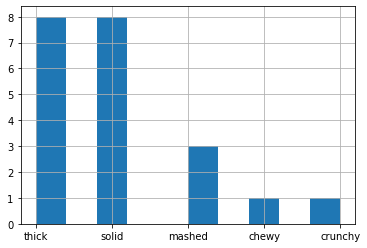

In [77]:
X_train.consistency.hist()

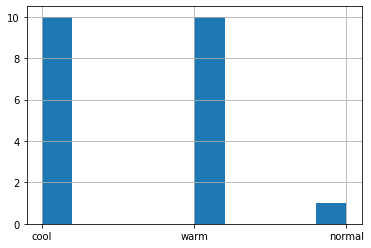

In [78]:
X_train.temperature.hist()

In [79]:
# Feature columns
tf_columns = []

for name in feature_names:
  vocabulary = X_train[name].unique()
  tf_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(name, vocabulary))

In [80]:
# Input functions
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    return ds
  
  return input_function

train_input_fn = make_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)


# [Linear Classifier](https://www.tensorflow.org/tutorials/estimator/linear)


In [81]:
# Linear estimator
from IPython.display import clear_output

linear_est = tf.estimator.LinearClassifier(feature_columns=tf_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.2857143, 'accuracy_baseline': 0.71428573, 'auc': 0.5, 'auc_precision_recall': 0.6416481, 'average_loss': 0.9767801, 'label/mean': 0.71428573, 'loss': 0.9767801, 'precision': 0.0, 'prediction/mean': 0.3026074, 'recall': 0.0, 'global_step': 10}


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3mufxwgs/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


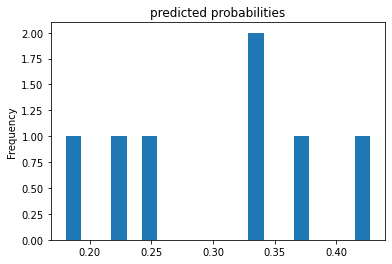

In [82]:
# Predicted probabilities.
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

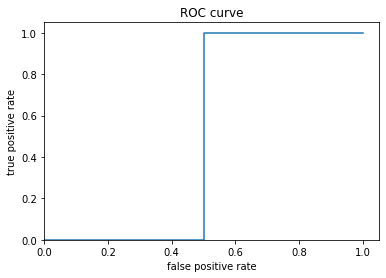

In [83]:
# ROC curve.
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)